In [85]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

In [86]:
# Load CSV files
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')


In [87]:
# Merge movies and ratings
merged_df = pd.merge(ratings, movies, on='movieId', how='left')
merged_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [88]:
# We merge movie_Id and user_Id next to bring in user generated tags
merged_df = pd.merge(merged_df, tags, on=['movieId', 'userId'], how='left')
merged_df

,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,NaN
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaN
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaN
...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,NaN,NaN
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,1.493844e+09
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,NaN,NaN
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,NaN,NaN


In [89]:
# Useful for external enrichment (like getting IMDb ratings or posters).
merged_df = pd.merge(merged_df, links, on='movieId', how='left')
merged_df


,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,NaN,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaN,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaN,114814,629.0
...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,NaN,NaN,4972582,381288.0
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,1.493844e+09,4425200,324552.0
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,NaN,NaN,5052448,419430.0
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,NaN,NaN,3315342,263115.0


In [90]:
# Check missing values
merged_df.isnull().sum()

userId             0
movieId            0
rating             0
timestamp_x        0
title              0
genres             0
tag            99201
timestamp_y    99201
imdbId             0
tmdbId            13
dtype: int64

In [91]:
# Drop duplicates
merged_df.drop_duplicates(inplace=True)
merged_df

,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,NaN,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaN,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaN,114814,629.0
...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,NaN,NaN,4972582,381288.0
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,1.493844e+09,4425200,324552.0
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,NaN,NaN,5052448,419430.0
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,NaN,NaN,3315342,263115.0


In [92]:
# Rename Columns
merged_df.rename(columns={'tag_x': 'tag', 'timestamp_x': 'timestamp', 'imdbId_x': 'imdbId', 'tmdbId_x': 'tmdbId'}, inplace=True)
merged_df


,userId,movieId,rating,timestamp,title,genres,tag,timestamp_y,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,NaN,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaN,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaN,114814,629.0
...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,NaN,NaN,4972582,381288.0
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,1.493844e+09,4425200,324552.0
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,NaN,NaN,5052448,419430.0
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,NaN,NaN,3315342,263115.0


In [93]:
# Check missing values
merged_df.isnull().sum()

userId             0
movieId            0
rating             0
timestamp          0
title              0
genres             0
tag            99201
timestamp_y    99201
imdbId             0
tmdbId            13
dtype: int64

In [94]:
# Convert timestamps
merged_df['timestamp_final'] = merged_df['timestamp'].fillna(merged_df['timestamp_y'])
merged_df['timestamp_final'] = pd.to_datetime(merged_df['timestamp_final'], unit='s', errors='coerce')
merged_df

,userId,movieId,rating,timestamp,title,genres,tag,timestamp_y,imdbId,tmdbId,timestamp_final
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,114709,862.0,2000-07-30 18:45:03
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,113228,15602.0,2000-07-30 18:20:47
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,NaN,113277,949.0,2000-07-30 18:37:04
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaN,114369,807.0,2000-07-30 19:03:35
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaN,114814,629.0,2000-07-30 18:48:51
...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,NaN,NaN,4972582,381288.0,2017-05-03 21:53:22
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,1.493844e+09,4425200,324552.0,2017-05-03 22:21:31
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,NaN,NaN,5052448,419430.0,2017-05-08 19:50:47
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,NaN,NaN,3315342,263115.0,2017-05-03 21:19:12


In [95]:
# Replace missing tags with 'No tag'
merged_df['tag']=merged_df['tag'].fillna('No Tag')
merged_df

,userId,movieId,rating,timestamp,title,genres,tag,timestamp_y,imdbId,tmdbId,timestamp_final
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,NaN,114709,862.0,2000-07-30 18:45:03
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,NaN,113228,15602.0,2000-07-30 18:20:47
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,NaN,113277,949.0,2000-07-30 18:37:04
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,NaN,114369,807.0,2000-07-30 19:03:35
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,NaN,114814,629.0,2000-07-30 18:48:51
...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,NaN,4972582,381288.0,2017-05-03 21:53:22
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,1.493844e+09,4425200,324552.0,2017-05-03 22:21:31
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,NaN,5052448,419430.0,2017-05-08 19:50:47
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,NaN,3315342,263115.0,2017-05-03 21:19:12


In [96]:
# Replace missing tags with 'No tag'
merged_df['tag']=merged_df['tag'].fillna('No Tag')
merged_df

,userId,movieId,rating,timestamp,title,genres,tag,timestamp_y,imdbId,tmdbId,timestamp_final
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,NaN,114709,862.0,2000-07-30 18:45:03
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,NaN,113228,15602.0,2000-07-30 18:20:47
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,NaN,113277,949.0,2000-07-30 18:37:04
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,NaN,114369,807.0,2000-07-30 19:03:35
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,NaN,114814,629.0,2000-07-30 18:48:51
...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,NaN,4972582,381288.0,2017-05-03 21:53:22
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,1.493844e+09,4425200,324552.0,2017-05-03 22:21:31
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,NaN,5052448,419430.0,2017-05-08 19:50:47
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,NaN,3315342,263115.0,2017-05-03 21:19:12


In [97]:
merged_df.drop(['timestamp_x', 'timestamp_y'], axis=1, inplace=True, errors='ignore')
merged_df

,userId,movieId,rating,timestamp,title,genres,tag,imdbId,tmdbId,timestamp_final
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,862.0,2000-07-30 18:45:03
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,15602.0,2000-07-30 18:20:47
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,949.0,2000-07-30 18:37:04
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,807.0,2000-07-30 19:03:35
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,629.0,2000-07-30 18:48:51
...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,381288.0,2017-05-03 21:53:22
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,324552.0,2017-05-03 22:21:31
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,419430.0,2017-05-08 19:50:47
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,263115.0,2017-05-03 21:19:12


In [98]:
merged_df.columns = merged_df.columns.str.capitalize()
merged_df

,Userid,Movieid,Rating,Timestamp,Title,Genres,Tag,Imdbid,Tmdbid,Timestamp_final
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,862.0,2000-07-30 18:45:03
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,15602.0,2000-07-30 18:20:47
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,949.0,2000-07-30 18:37:04
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,807.0,2000-07-30 19:03:35
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,629.0,2000-07-30 18:48:51
...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,381288.0,2017-05-03 21:53:22
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,324552.0,2017-05-03 22:21:31
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,419430.0,2017-05-08 19:50:47
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,263115.0,2017-05-03 21:19:12


In [99]:
# -------------------------------
# 🎯 FEATURE ENGINEERING SECTION
# -------------------------------

In [100]:
# 1. Extract release year from movie title
merged_df['Release_Year'] = merged_df['Title'].str.extract(r'\((\d{4})\)').astype(float)
merged_df
# Reason: The year a movie was released can affect ratings — 
# older movies might have different audience sentiment compared to newer ones.

,Userid,Movieid,Rating,Timestamp,Title,Genres,Tag,Imdbid,Tmdbid,Timestamp_final,Release_Year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,862.0,2000-07-30 18:45:03,1995.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,15602.0,2000-07-30 18:20:47,1995.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,949.0,2000-07-30 18:37:04,1995.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,807.0,2000-07-30 19:03:35,1995.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,629.0,2000-07-30 18:48:51,1995.0
...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,381288.0,2017-05-03 21:53:22,2017.0
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,324552.0,2017-05-03 22:21:31,2017.0
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,419430.0,2017-05-08 19:50:47,2017.0
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,263115.0,2017-05-03 21:19:12,2017.0


In [101]:
# 2. Count the number of genres per movie
merged_df['Num_Genres'] = merged_df['Genres'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)
merged_df

# Reason: Movies that span multiple genres might attract wider audiences and influence average ratings.

,Userid,Movieid,Rating,Timestamp,Title,Genres,Tag,Imdbid,Tmdbid,Timestamp_final,Release_Year,Num_Genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,862.0,2000-07-30 18:45:03,1995.0,5
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,15602.0,2000-07-30 18:20:47,1995.0,2
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,949.0,2000-07-30 18:37:04,1995.0,3
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,807.0,2000-07-30 19:03:35,1995.0,2
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,629.0,2000-07-30 18:48:51,1995.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,381288.0,2017-05-03 21:53:22,2017.0,3
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,324552.0,2017-05-03 22:21:31,2017.0,3
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,419430.0,2017-05-08 19:50:47,2017.0,1
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,263115.0,2017-05-03 21:19:12,2017.0,2


In [102]:
# 3. Simplify the genres column by taking the first genre only
merged_df['Main_Genre'] = merged_df['Genres'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else 'Unknown')
merged_df

# Reason: Helps to categorize and group movies more easily for visualizations or recommendations.

,Userid,Movieid,Rating,Timestamp,Title,Genres,Tag,Imdbid,Tmdbid,Timestamp_final,Release_Year,Num_Genres,Main_Genre
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,862.0,2000-07-30 18:45:03,1995.0,5,Adventure
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,15602.0,2000-07-30 18:20:47,1995.0,2,Comedy
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,949.0,2000-07-30 18:37:04,1995.0,3,Action
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,807.0,2000-07-30 19:03:35,1995.0,2,Mystery
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,629.0,2000-07-30 18:48:51,1995.0,3,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,381288.0,2017-05-03 21:53:22,2017.0,3,Drama
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,324552.0,2017-05-03 22:21:31,2017.0,3,Action
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,419430.0,2017-05-08 19:50:47,2017.0,1,Horror
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,263115.0,2017-05-03 21:19:12,2017.0,2,Action


In [103]:
# 4. --- Create a rating sentiment feature ---

# Define a simple function to classify ratings
def rating_category(r):
    """
    Categorizes a movie rating into Positive, Neutral, or Negative.
    - Ratings >= 4.0 → Positive
    - Ratings between 2.5 and 3.9 → Neutral
    - Ratings below 2.5 → Negative
    """
    try:
        r = float(r)  # Convert to numeric (handles strings)
    except Exception:
        return 'Unknown'  # Return Unknown if invalid

    if r >= 4.0:
        return 'Positive'
    elif r >= 2.5:
        return 'Neutral'
    else:
        return 'Negative'

# Create a new column with the function
merged_df['Rating_Sentiment'] = merged_df['Rating'].apply(rating_category)
merged_df

,Userid,Movieid,Rating,Timestamp,Title,Genres,Tag,Imdbid,Tmdbid,Timestamp_final,Release_Year,Num_Genres,Main_Genre,Rating_Sentiment
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,862.0,2000-07-30 18:45:03,1995.0,5,Adventure,Positive
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,15602.0,2000-07-30 18:20:47,1995.0,2,Comedy,Positive
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,949.0,2000-07-30 18:37:04,1995.0,3,Action,Positive
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,807.0,2000-07-30 19:03:35,1995.0,2,Mystery,Positive
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,629.0,2000-07-30 18:48:51,1995.0,3,Crime,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,381288.0,2017-05-03 21:53:22,2017.0,3,Drama,Positive
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,324552.0,2017-05-03 22:21:31,2017.0,3,Action,Positive
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,419430.0,2017-05-08 19:50:47,2017.0,1,Horror,Positive
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,263115.0,2017-05-03 21:19:12,2017.0,2,Action,Positive


In [104]:
# Quick check
merged_df['Rating_Sentiment'].value_counts()

Rating_Sentiment
Positive    49940
Neutral     39181
Negative    13556
Name: count, dtype: int64

In [105]:
# 5. Convert timestamp (when the rating was made) into datetime and extract year
merged_df['Rating_Datetime'] = pd.to_datetime(merged_df['Timestamp_final'], unit='s', errors='coerce')
merged_df['Rating_Year'] = merged_df['Rating_Datetime'].dt.year
merged_df

# Reason: The year of rating helps track rating trends over time — useful for understanding user activity patterns.


,Userid,Movieid,Rating,Timestamp,Title,Genres,Tag,Imdbid,Tmdbid,Timestamp_final,Release_Year,Num_Genres,Main_Genre,Rating_Sentiment,Rating_Datetime,Rating_Year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,862.0,2000-07-30 18:45:03,1995.0,5,Adventure,Positive,2000-07-30 18:45:03,2000
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,15602.0,2000-07-30 18:20:47,1995.0,2,Comedy,Positive,2000-07-30 18:20:47,2000
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,949.0,2000-07-30 18:37:04,1995.0,3,Action,Positive,2000-07-30 18:37:04,2000
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,807.0,2000-07-30 19:03:35,1995.0,2,Mystery,Positive,2000-07-30 19:03:35,2000
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,629.0,2000-07-30 18:48:51,1995.0,3,Crime,Positive,2000-07-30 18:48:51,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,381288.0,2017-05-03 21:53:22,2017.0,3,Drama,Positive,2017-05-03 21:53:22,2017
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,324552.0,2017-05-03 22:21:31,2017.0,3,Action,Positive,2017-05-03 22:21:31,2017
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,419430.0,2017-05-08 19:50:47,2017.0,1,Horror,Positive,2017-05-08 19:50:47,2017
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,263115.0,2017-05-03 21:19:12,2017.0,2,Action,Positive,2017-05-03 21:19:12,2017


In [106]:
#  Create a feature for number of ratings per movie
movie_rating_count = merged_df.groupby('Movieid')['Rating'].count().reset_index()
movie_rating_count.rename(columns={'Rating': 'Num_Ratings'}, inplace=True)
merged_df

# Reason: A key feature for recommendation systems which indicates overall popularity or quality of a movie.

,Userid,Movieid,Rating,Timestamp,Title,Genres,Tag,Imdbid,Tmdbid,Timestamp_final,Release_Year,Num_Genres,Main_Genre,Rating_Sentiment,Rating_Datetime,Rating_Year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,862.0,2000-07-30 18:45:03,1995.0,5,Adventure,Positive,2000-07-30 18:45:03,2000
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,15602.0,2000-07-30 18:20:47,1995.0,2,Comedy,Positive,2000-07-30 18:20:47,2000
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,949.0,2000-07-30 18:37:04,1995.0,3,Action,Positive,2000-07-30 18:37:04,2000
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,807.0,2000-07-30 19:03:35,1995.0,2,Mystery,Positive,2000-07-30 19:03:35,2000
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,629.0,2000-07-30 18:48:51,1995.0,3,Crime,Positive,2000-07-30 18:48:51,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,381288.0,2017-05-03 21:53:22,2017.0,3,Drama,Positive,2017-05-03 21:53:22,2017
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,324552.0,2017-05-03 22:21:31,2017.0,3,Action,Positive,2017-05-03 22:21:31,2017
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,419430.0,2017-05-08 19:50:47,2017.0,1,Horror,Positive,2017-05-08 19:50:47,2017
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,263115.0,2017-05-03 21:19:12,2017.0,2,Action,Positive,2017-05-03 21:19:12,2017


In [107]:
# 6. Calculate average rating per movie (aggregated feature)

movie_avg_rating = merged_df.groupby('Movieid')['Rating'].mean().reset_index()
movie_avg_rating.rename(columns={'Rating':'Avg_Movie_Rating'}, inplace=True)
merged_df = merged_df.merge(movie_avg_rating, on='Movieid', how='left')
merged_df

#Reason: A key feature for recommendation systems indicates overall popularity or quality of a movie.

,Userid,Movieid,Rating,Timestamp,Title,Genres,Tag,Imdbid,Tmdbid,Timestamp_final,Release_Year,Num_Genres,Main_Genre,Rating_Sentiment,Rating_Datetime,Rating_Year,Avg_Movie_Rating
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,862.0,2000-07-30 18:45:03,1995.0,5,Adventure,Positive,2000-07-30 18:45:03,2000,3.920930
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,15602.0,2000-07-30 18:20:47,1995.0,2,Comedy,Positive,2000-07-30 18:20:47,2000,3.245283
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,949.0,2000-07-30 18:37:04,1995.0,3,Action,Positive,2000-07-30 18:37:04,2000,3.946078
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,807.0,2000-07-30 19:03:35,1995.0,2,Mystery,Positive,2000-07-30 19:03:35,2000,3.980392
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,629.0,2000-07-30 18:48:51,1995.0,3,Crime,Positive,2000-07-30 18:48:51,2000,4.252404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,381288.0,2017-05-03 21:53:22,2017.0,3,Drama,Positive,2017-05-03 21:53:22,2017,3.333333
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,324552.0,2017-05-03 22:21:31,2017.0,3,Action,Positive,2017-05-03 22:21:31,2017,4.307692
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,419430.0,2017-05-08 19:50:47,2017.0,1,Horror,Positive,2017-05-08 19:50:47,2017,3.633333
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,263115.0,2017-05-03 21:19:12,2017.0,2,Action,Positive,2017-05-03 21:19:12,2017,4.241379


In [108]:
merged_df.columns

Index(['Userid', 'Movieid', 'Rating', 'Timestamp', 'Title', 'Genres', 'Tag',
       'Imdbid', 'Tmdbid', 'Timestamp_final', 'Release_Year', 'Num_Genres',
       'Main_Genre', 'Rating_Sentiment', 'Rating_Datetime', 'Rating_Year',
       'Avg_Movie_Rating'],
      dtype='object')

In [109]:
merged_df.drop('Rating_Datetime', axis=1, inplace=True)
merged_df

,Userid,Movieid,Rating,Timestamp,Title,Genres,Tag,Imdbid,Tmdbid,Timestamp_final,Release_Year,Num_Genres,Main_Genre,Rating_Sentiment,Rating_Year,Avg_Movie_Rating
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,862.0,2000-07-30 18:45:03,1995.0,5,Adventure,Positive,2000,3.920930
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,15602.0,2000-07-30 18:20:47,1995.0,2,Comedy,Positive,2000,3.245283
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,949.0,2000-07-30 18:37:04,1995.0,3,Action,Positive,2000,3.946078
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,807.0,2000-07-30 19:03:35,1995.0,2,Mystery,Positive,2000,3.980392
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,629.0,2000-07-30 18:48:51,1995.0,3,Crime,Positive,2000,4.252404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,381288.0,2017-05-03 21:53:22,2017.0,3,Drama,Positive,2017,3.333333
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,324552.0,2017-05-03 22:21:31,2017.0,3,Action,Positive,2017,4.307692
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,419430.0,2017-05-08 19:50:47,2017.0,1,Horror,Positive,2017,3.633333
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,263115.0,2017-05-03 21:19:12,2017.0,2,Action,Positive,2017,4.241379


In [110]:
print("Duplicates:", merged_df.duplicated().sum())

Duplicates: 0


In [111]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102677 entries, 0 to 102676
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Userid            102677 non-null  int64         
 1   Movieid           102677 non-null  int64         
 2   Rating            102677 non-null  float64       
 3   Timestamp         102677 non-null  int64         
 4   Title             102677 non-null  object        
 5   Genres            102677 non-null  object        
 6   Tag               102677 non-null  object        
 7   Imdbid            102677 non-null  int64         
 8   Tmdbid            102664 non-null  float64       
 9   Timestamp_final   102677 non-null  datetime64[ns]
 10  Release_Year      102657 non-null  float64       
 11  Num_Genres        102677 non-null  int64         
 12  Main_Genre        102677 non-null  object        
 13  Rating_Sentiment  102677 non-null  object        
 14  Rati

In [112]:
# Check missing values
merged_df.isnull().sum()

Userid               0
Movieid              0
Rating               0
Timestamp            0
Title                0
Genres               0
Tag                  0
Imdbid               0
Tmdbid              13
Timestamp_final      0
Release_Year        20
Num_Genres           0
Main_Genre           0
Rating_Sentiment     0
Rating_Year          0
Avg_Movie_Rating     0
dtype: int64

In [113]:
merged_df.drop(columns=['Tmdbid'], inplace=True, errors='ignore')
merged_df

,Userid,Movieid,Rating,Timestamp,Title,Genres,Tag,Imdbid,Timestamp_final,Release_Year,Num_Genres,Main_Genre,Rating_Sentiment,Rating_Year,Avg_Movie_Rating
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,2000-07-30 18:45:03,1995.0,5,Adventure,Positive,2000,3.920930
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,2000-07-30 18:20:47,1995.0,2,Comedy,Positive,2000,3.245283
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,2000-07-30 18:37:04,1995.0,3,Action,Positive,2000,3.946078
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,2000-07-30 19:03:35,1995.0,2,Mystery,Positive,2000,3.980392
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,2000-07-30 18:48:51,1995.0,3,Crime,Positive,2000,4.252404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,2017-05-03 21:53:22,2017.0,3,Drama,Positive,2017,3.333333
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,2017-05-03 22:21:31,2017.0,3,Action,Positive,2017,4.307692
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,2017-05-08 19:50:47,2017.0,1,Horror,Positive,2017,3.633333
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,2017-05-03 21:19:12,2017.0,2,Action,Positive,2017,4.241379


In [114]:
# Check missing values
merged_df.isnull().sum()

Userid               0
Movieid              0
Rating               0
Timestamp            0
Title                0
Genres               0
Tag                  0
Imdbid               0
Timestamp_final      0
Release_Year        20
Num_Genres           0
Main_Genre           0
Rating_Sentiment     0
Rating_Year          0
Avg_Movie_Rating     0
dtype: int64

In [115]:
merged_df.columns=['User_ID', 'Movie_ID','Rating', 'Timestamp', 'Title', 'Genres', 'Tag', 'Imdbid', 'Timestamp_Final','Release_Year','Num_Genres','Main_Genres',
                'Rating_Sentiment', 'Rating_Year', 'Avg_Movie_Rating']
merged_df
            

,User_ID,Movie_ID,Rating,Timestamp,Title,Genres,Tag,Imdbid,Timestamp_Final,Release_Year,Num_Genres,Main_Genres,Rating_Sentiment,Rating_Year,Avg_Movie_Rating
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,2000-07-30 18:45:03,1995.0,5,Adventure,Positive,2000,3.920930
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,2000-07-30 18:20:47,1995.0,2,Comedy,Positive,2000,3.245283
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,2000-07-30 18:37:04,1995.0,3,Action,Positive,2000,3.946078
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,2000-07-30 19:03:35,1995.0,2,Mystery,Positive,2000,3.980392
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,2000-07-30 18:48:51,1995.0,3,Crime,Positive,2000,4.252404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,2017-05-03 21:53:22,2017.0,3,Drama,Positive,2017,3.333333
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,2017-05-03 22:21:31,2017.0,3,Action,Positive,2017,4.307692
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,2017-05-08 19:50:47,2017.0,1,Horror,Positive,2017,3.633333
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,2017-05-03 21:19:12,2017.0,2,Action,Positive,2017,4.241379


In [116]:
print("Columns after:", merged_df.columns.tolist())

Columns after: ['User_ID', 'Movie_ID', 'Rating', 'Timestamp', 'Title', 'Genres', 'Tag', 'Imdbid', 'Timestamp_Final', 'Release_Year', 'Num_Genres', 'Main_Genres', 'Rating_Sentiment', 'Rating_Year', 'Avg_Movie_Rating']


In [117]:
Avg_Movie_Rating=merged_df['Rating'].mean().round(2)
print (Avg_Movie_Rating)

3.51


In [118]:
merged_df.to_csv("cleaned_dataset.csv", index=False)
merged_df

,User_ID,Movie_ID,Rating,Timestamp,Title,Genres,Tag,Imdbid,Timestamp_Final,Release_Year,Num_Genres,Main_Genres,Rating_Sentiment,Rating_Year,Avg_Movie_Rating
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,2000-07-30 18:45:03,1995.0,5,Adventure,Positive,2000,3.920930
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,2000-07-30 18:20:47,1995.0,2,Comedy,Positive,2000,3.245283
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,No Tag,113277,2000-07-30 18:37:04,1995.0,3,Action,Positive,2000,3.946078
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,2000-07-30 19:03:35,1995.0,2,Mystery,Positive,2000,3.980392
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,2000-07-30 18:48:51,1995.0,3,Crime,Positive,2000,4.252404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,No Tag,4972582,2017-05-03 21:53:22,2017.0,3,Drama,Positive,2017,3.333333
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,2017-05-03 22:21:31,2017.0,3,Action,Positive,2017,4.307692
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,No Tag,5052448,2017-05-08 19:50:47,2017.0,1,Horror,Positive,2017,3.633333
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,No Tag,3315342,2017-05-03 21:19:12,2017.0,2,Action,Positive,2017,4.241379


In [119]:
merged_df.dtypes

User_ID                      int64
Movie_ID                     int64
Rating                     float64
Timestamp                    int64
Title                       object
Genres                      object
Tag                         object
Imdbid                       int64
Timestamp_Final     datetime64[ns]
Release_Year               float64
Num_Genres                   int64
Main_Genres                 object
Rating_Sentiment            object
Rating_Year                  int32
Avg_Movie_Rating           float64
dtype: object

In [120]:
import pandas as pd

# Convert problematic columns
merged_df['Timestamp_Final'] = pd.to_datetime(merged_df['Timestamp_Final'], errors='coerce')  # from integer or string
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'], errors='coerce').dt.time     # only time
merged_df['Release_Year'] = merged_df['Release_Year'].astype('Int64')                # integer with missing values allowed



In [121]:
print(merged_df[['Timestamp_Final', 'Timestamp', 'Release_Year']].dtypes)


Timestamp_Final    datetime64[ns]
Timestamp                  object
Release_Year                Int64
dtype: object


In [122]:
merged_df['Avg_Movie_Rating'] = np.ceil(merged_df['Avg_Movie_Rating'] * 100) / 100
merged_df

,User_ID,Movie_ID,Rating,Timestamp,Title,Genres,Tag,Imdbid,Timestamp_Final,Release_Year,Num_Genres,Main_Genres,Rating_Sentiment,Rating_Year,Avg_Movie_Rating
0,1,1,4.0,00:00:00.964982,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,2000-07-30 18:45:03,1995,5,Adventure,Positive,2000,3.93
1,1,3,4.0,00:00:00.964981,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,2000-07-30 18:20:47,1995,2,Comedy,Positive,2000,3.25
2,1,6,4.0,00:00:00.964982,Heat (1995),Action|Crime|Thriller,No Tag,113277,2000-07-30 18:37:04,1995,3,Action,Positive,2000,3.95
3,1,47,5.0,00:00:00.964983,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,2000-07-30 19:03:35,1995,2,Mystery,Positive,2000,3.99
4,1,50,5.0,00:00:00.964982,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,2000-07-30 18:48:51,1995,3,Crime,Positive,2000,4.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,00:00:01.493848,Split (2017),Drama|Horror|Thriller,No Tag,4972582,2017-05-03 21:53:22,2017,3,Drama,Positive,2017,3.34
102673,610,168248,5.0,00:00:01.493850,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,2017-05-03 22:21:31,2017,3,Action,Positive,2017,4.31
102674,610,168250,5.0,00:00:01.494273,Get Out (2017),Horror,No Tag,5052448,2017-05-08 19:50:47,2017,1,Horror,Positive,2017,3.64
102675,610,168252,5.0,00:00:01.493846,Logan (2017),Action|Sci-Fi,No Tag,3315342,2017-05-03 21:19:12,2017,2,Action,Positive,2017,4.25


In [123]:
merged_df.to_csv("cleaned_dataset.csv", index=False)
merged_df

,User_ID,Movie_ID,Rating,Timestamp,Title,Genres,Tag,Imdbid,Timestamp_Final,Release_Year,Num_Genres,Main_Genres,Rating_Sentiment,Rating_Year,Avg_Movie_Rating
0,1,1,4.0,00:00:00.964982,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag,114709,2000-07-30 18:45:03,1995,5,Adventure,Positive,2000,3.93
1,1,3,4.0,00:00:00.964981,Grumpier Old Men (1995),Comedy|Romance,No Tag,113228,2000-07-30 18:20:47,1995,2,Comedy,Positive,2000,3.25
2,1,6,4.0,00:00:00.964982,Heat (1995),Action|Crime|Thriller,No Tag,113277,2000-07-30 18:37:04,1995,3,Action,Positive,2000,3.95
3,1,47,5.0,00:00:00.964983,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag,114369,2000-07-30 19:03:35,1995,2,Mystery,Positive,2000,3.99
4,1,50,5.0,00:00:00.964982,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag,114814,2000-07-30 18:48:51,1995,3,Crime,Positive,2000,4.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,00:00:01.493848,Split (2017),Drama|Horror|Thriller,No Tag,4972582,2017-05-03 21:53:22,2017,3,Drama,Positive,2017,3.34
102673,610,168248,5.0,00:00:01.493850,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed,4425200,2017-05-03 22:21:31,2017,3,Action,Positive,2017,4.31
102674,610,168250,5.0,00:00:01.494273,Get Out (2017),Horror,No Tag,5052448,2017-05-08 19:50:47,2017,1,Horror,Positive,2017,3.64
102675,610,168252,5.0,00:00:01.493846,Logan (2017),Action|Sci-Fi,No Tag,3315342,2017-05-03 21:19:12,2017,2,Action,Positive,2017,4.25



#### EXPLANATORY DATA ANALYSIS (VISUALIZATION + INTERPRETATION)

 #### 1. Ratings Overview

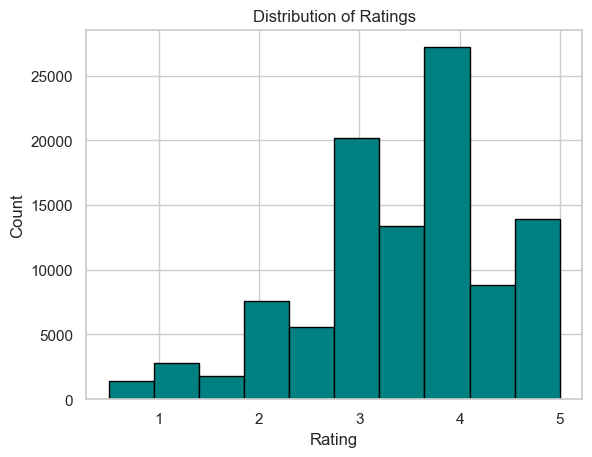

' Most ratings are clustered between 3 and 4 stars, \nindicating that users tend to rate movies\nmoderately high rater than extemely low or perfect.'

In [126]:
# Distribution of Ratings
import matplotlib.pyplot as plt
merged_df['Rating'].hist(bins=10, color='teal', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

# Comment/Insight
""" Most ratings are clustered between 3 and 4 stars, 
indicating that users tend to rate movies
moderately high rater than extemely low or perfect."""

In [127]:
# Average rating per movie or user
merged_df.groupby('Movie_ID')['Rating'].mean().sort_values(ascending=False).head(10)


# Comment/Insight
""" Some movies or users have significantly higher
or lower average ratings, showing variability in users
preferences and movie quality."""

' Some movies or users have significantly higher\nor lower average ratings, showing variability in users\npreferences and movie quality.'

#### 2. Movies / Genres Analysis

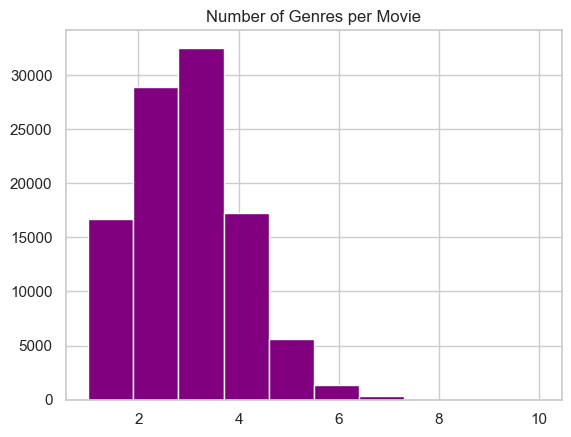

' Comedy, Drama, and Action are the most common genres,\nwhile others like War or Musical are less frequent,\nindicating genre popularity in the datase.'

In [129]:
# Count movies per genre
merged_df['Num_Genres'] = merged_df['Genres'].str.split('|').apply(len)  # if not done already
merged_df['Num_Genres'].hist(color='purple')
plt.title('Number of Genres per Movie')
plt.show()

# Comment/Insight
""" Comedy, Drama, and Action are the most common genres,
while others like War or Musical are less frequent,
indicating genre popularity in the datase."""

In [130]:
# Average rating by genre 
merged_df.groupby('Main_Genres') ['Rating'].mean().sort_values(ascending=False)

# Comment/Insight
""" Certain genres, like Drama or Adventure, 
trend to receive slightly higher average ratings than others,
suggesting user perference patterns by genre."""

' Certain genres, like Drama or Adventure, \ntrend to receive slightly higher average ratings than others,\nsuggesting user perference patterns by genre.'

### 3. Feature Relationships

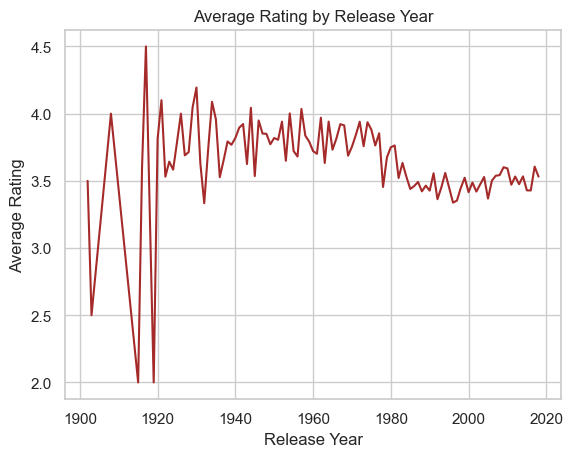

' Older movies show more variability in average ratings,\nwhile recent releases have more consistent ratings around the median,\nwhich may reflect modern audience trends or dataset bias.'

In [132]:
# Release year vs. average rating
merged_df.groupby('Release_Year')['Rating'].mean().plot(kind='line', color='brown')
plt.title('Average Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()

# Comment/Insight
""" Older movies show more variability in average ratings,
while recent releases have more consistent ratings around the median,
which may reflect modern audience trends or dataset bias."""


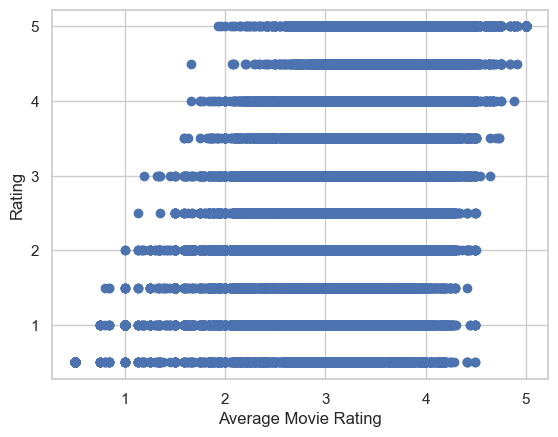

' There is a slight positive correlation between the number\nof genres and average ratings, suggesting movies with more\ngenres might appeal to a broader audience.'

In [133]:
# Average Movie Rating vs. other features
plt.scatter(merged_df['Avg_Movie_Rating'], merged_df['Rating'])
plt.xlabel('Average Movie Rating')
plt.ylabel ('Rating')
plt.show()

# Comment/Insight
""" There is a slight positive correlation between the number
of genres and average ratings, suggesting movies with more
genres might appeal to a broader audience."""

### 4. User Behavior

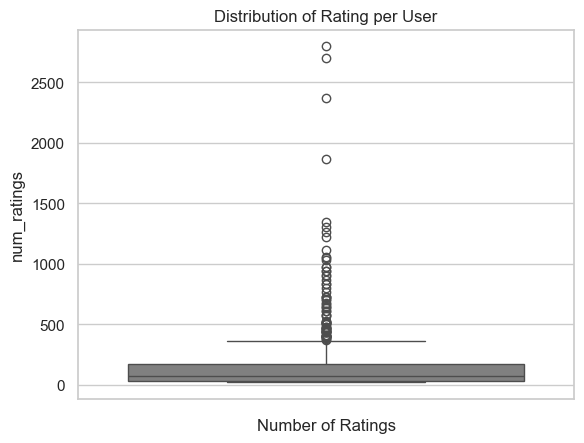

' Most users rate only a small number of movies, while a fewer \nhighly active users (outliers) rate many movies, indicating that the\ndataset is sparse and influenced by power users.'

In [135]:
# Number of ratings per user
ratings_per_user = merged_df.groupby('User_ID')['Rating'].count().reset_index(name='num_ratings')

sns.boxplot(y='num_ratings', data=ratings_per_user, color='gray')
plt.xlabel('Number of Ratings')
plt.title('Distribution of Rating per User')
plt.show()

# Comment/Insight
""" Most users rate only a small number of movies, while a fewer 
highly active users (outliers) rate many movies, indicating that the
dataset is sparse and influenced by power users."""

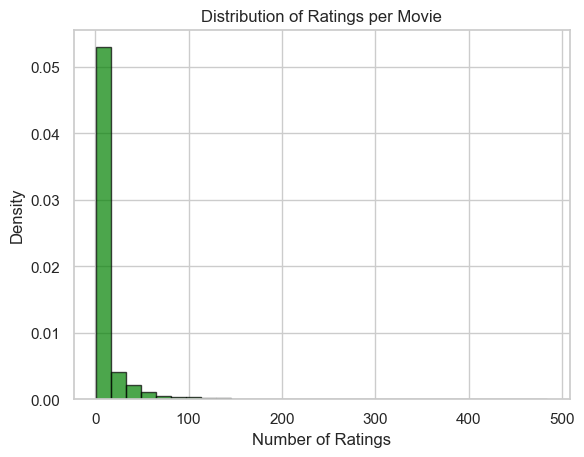

' The distribution of ratings per movie shows that most movies\nreceive few ratings, while only a few get many showing that user \nactivity is focused on popular titles'

In [136]:
# Analyze number of ratings per user
ratings_per_movie = merged_df.groupby('Movie_ID')['Rating'].count()
plt.hist(ratings_per_movie, bins=30, density=True, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Density')
plt.title('Distribution of Ratings per Movie')
plt.show()

# Comment/Insight
""" The distribution of ratings per movie shows that most movies
receive few ratings, while only a few get many showing that user 
activity is focused on popular titles"""